# Filter dan Jendela

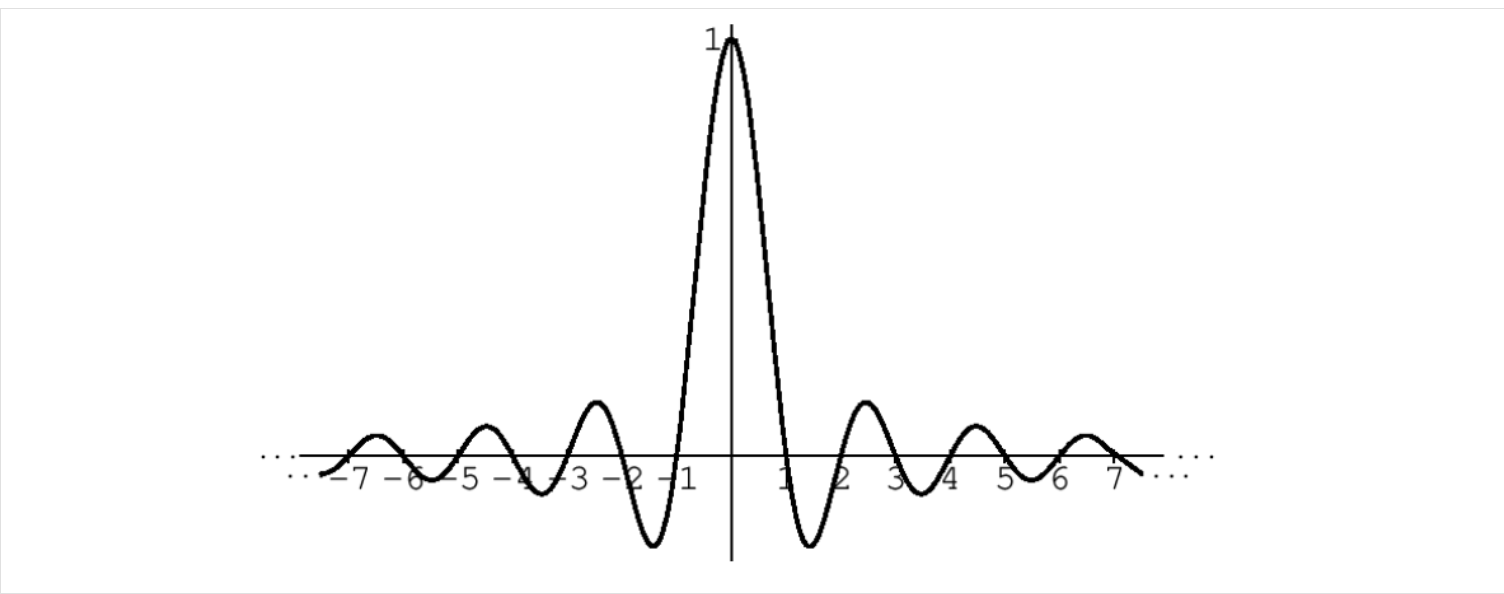

Anggaplah kita ingin memiliki filter rendah FIR yang kausal, yang berarti respon impulsnya dimulai pada waktu 0 dan berlangsung hanya pada sejumlah sampel berhingga, n=0,...,L-1, untuk panjang L. (Perhatikan bahwa filter FIR tidak memiliki analogi dalam domain analog, filter analog selalu memiliki respon impuls yang tak terbatas, IIR)

Bagaimana kita merancang filter ini sehingga menjadi "mirip" dalam beberapa arti dengan filter ideal? (Karena kita tidak dapat mendapatkan filter yang ideal)

Contoh: Merancang filter anti-aliasing untuk konversi laju sampel: Sinyal asli berasal dari CD dengan laju sampel 44,1 kHz, sehingga memiliki bandwidth audio hingga sekitar 20 kHz, dan kita ingin mereduksi sampelnya menjadi laju sampel 22 kHz, misalnya untuk komputer Mac. Agar dapat mereduksi sampelnya, pertama-tama kita harus menyaring sinyal tersebut dengan filter rendah, misalnya pita lintasnya harus dari 0 hingga 9 kHz, dan pita henti, untuk menghindari aliasing frekuensi di atas 11 kHz, harus dari 11 kHz hingga maksimum (di sini: 22,05 kHz). Karena kita tidak memiliki filter ideal, kita perlu menyertakan pita "transisi", di sini dari 9 kHz hingga 11 kHz, untuk membiarkan filter "bertransisi" dari pita lintas ke pita henti, dengan attenuasi yang intermediat.

Aliasing adalah sesuatu yang mudah terdeteksi oleh telinga, sehingga kita ingin memiliki attenuasi setidaknya 60 dB dari 11 kHz ke atas. Pita lintas dapat memiliki beberapa gelombang pada respons frekuensinya, misalnya ± 2 dB (yang setara dengan sekitar ±25% dalam tegangan). Rentang frekuensi dari 9 kHz hingga 11 kHz disebut sebagai pita transisi, yang memberikan ruang bagi filter untuk membangun attenuasinya dari 0 hingga 60 dB, untuk memastikan bahwa filter tersebut sudah memiliki 60 dB pada frekuensi 11 kHz. Dengan cara ini, kita dapat merumuskan persyaratan untuk "kemiripan" filter kita, meskipun kita tahu bahwa kita tidak dapat mencapai yang optimal (pendekatan praktis).

Pendekatan pertama (mungkin naif) adalah dengan mendefinisikan kemiripan sebagai kesalahan kuadrat dari respons frekuensi filter FIR kita terhadap respons frekuensi ideal yang diberikan (biasanya ini berarti magnitudo respons frekuensi). Ini memiliki keuntungan menjadi sangat sederhana secara matematis. Ini berarti tujuan kita adalah meminimalkan kesalahan kuadrat ini. Anggaplah respons frekuensi yang diinginkan adalah Hd(ω), dan respons frekuensi (nyata) dari filter FIR kausal kita adalah H(ω). Maka kesalahan kuadrat e adalah

$$ \large
 {e= \int _{ {0} } ^ { {2π} }  { \mid H_ {{d} }  ( ω )  - { H ( ω )}  \mid  ^ { {2} } dω} } {}
$$


Kita ingin membuat kesalahan e sekecil mungkin. Perhatikan bahwa kita memerlukan integral di sini karena sinyal domain frekuensinya kontinu, karena sinyal domain waktu tidak periodik (hanya pada saat itulah transformasi Fourier akan menjadi diskret di atas frekuensi). Tetapi di sini kita memiliki fungsi sinc dengan rentang tak hingga sepanjang waktu. Perhatikan bahwa karena ini juga kita tidak bisa menerapkan Transformasi Fourier Diskrit, karena itu dibuat untuk sinyal periodik dengan periode yang berhingga (DFT biasanya diterapkan hanya pada periode berhingga ini). Tetapi Transformasi Fourier Waktu Diskrit adalah untuk sinyal waktu diskrit dengan periode yang tak berhingga.

Kita perlu meminimalkan kesalahan kuadrat e untuk menemukan pendekatan terbaik dengan filter FIR kita. Kita tidak bisa menyelesaikan masalah ini di domain frekuensi, tetapi kita bisa menyelesaikan formulasi yang setara di domain waktu.

Untuk mendapatkan ini, kita menggunakan apa yang disebut Teorema Parseval, yang menyatakan bahwa daya sinyal (jumlah dari kuadrat magnitudenya) sama di domain waktu dan di domain frekuensi (hal ini berlaku untuk Transformasi Fourier Waktu Diskrit serta untuk DFT).

$$ \large
 {e= \int_{ {0} }  ^{ {2π} }  { \mid H _ { {d} }  ( ω )  - H ( ω )\mid ^ { {2} } dω= \sum _{ {n= -  \infty } } ^ { { \infty } }  { \mid h _ { {d} }  ( n )  - h ( n )  \mid  ^ { {2} } } } } {}
$$

Keindahan di sini adalah sekarang kita mendapatkan sebuah jumlah, yang sekarang dapat kita hitung lebih mudah (ingat: kita ingin mendapatkan h(n)).

Untuk filter rendah ideal kita, hd(n) adalah fungsi sinc. Untuk mendapatkan filter kausal, kita sudah memperbolehkan pergeseran waktu nd untuk respon impuls ideal (menggunakan filter FIR kita h(n) membuat kausalitas menjadi mungkin). Memasukkan ini ke dalam persamaan di atas menghasilkan:

$$ \large
{e= \sum _{ {n= -  \infty } }  ^ { { \infty } }  { \mid \frac    {sin (  ( n - n _ { {d} }  ) \omega_{{p} }  ) }   { ( n - n _ { {d} }  ) \omega_ { {p} } } }  - h ( n )  \mid  ^ { {2} } } {}
$$

Bagaimana kita harus memilih h(n) dan tundaan nd untuk mendapatkan kesalahan kuadrat minimum e untuk panjang L yang diberikan dari h(n)?

Diberikan panjang L, kita perlu menentukan L koefisien h(n) dan parameter tunda $n_d$:

Untuk membuat solusi lebih mudah dipahami, kita bisa membagi jumlahnya menjadi 2 bagian, satu untuk rentang h(n) dan satu untuk sisa:

$$ 
{e= \sum _{ {n= 0 } }  ^ { { L - 1} }  { \mid \frac    {sin (  ( n - n _ { {d} }  ) \omega_{{p} }  ) }   { ( n - n _ { {d} }  ) \omega_ { {p} } } }  - h ( n )  \mid  ^ { {2} } } {}
+{ \sum _{ {n<0 } }  ^ { { n>L-1 } }  { \mid \frac    {sin (  ( n - n _ { {d} }  ) \omega_{{p} }  ) }   { ( n - n _ { {d} }  ) \omega_ { {p} } } }   \mid  ^ { {2} } } {}
$$

Kedua istilah tersebut positif, sehingga untuk meminimalkan e kita harus meminimalkan kedua istilah tersebut. Untuk meminimalkan istilah di sebelah kanan, kita hanya memiliki $n_d$. Kita dapat memilih $n_d$ sedemikian rupa sehingga hanya nilai-nilai terkecil yang muncul di sana, dan nilai-nilai terbesar $h_d$ tidak "dilihat" oleh jumlah di sebelah kanan, dan tercover oleh h(n) di jumlah di sebelah kiri. Kita dapat membayangkan jumlah di sebelah kiri sebagai "jendela persegi panjang" yang disebut, di mana kita dapat menggeser fungsi sinc di atas fungsi jendela ini untuk mendapatkan h(n).

Jendela persegi panjang adalah fungsi yang memiliki nilai 1 di dalam panjang jendela dan nilai 0 di luar panjang jendela. Jumlah terbatas dapat dibayangkan sebagai hasil dari pertama kali mengalikan fungsi sinc tak terhingga dengan jendela persegi panjang ini, dan kemudian menghitung jumlahnya, yang menjadi terbata

Tujuannya di sini adalah untuk menggeser fungsi sinc, menggunakan penundaan $n_d$, sedemikian rupa sehingga jendela untuk h(n) "melihat" nilai-nilai terbesar dari fungsi sinc. Perhatikan bahwa ini menghasilkan respons impuls yang berdampingan. Dengan menggunakan rumus di atas, juga mungkin untuk hanya memilih nilai-nilai magnitudo terbesar dari fungsi sinc untuk h(n) (maksima dan minima), untuk respons impuls yang tidak berdampingan, yang akan menghasilkan kesalahan kuadrat yang lebih kecil untuk L koefisien! (Pertanyaan: Bagaimana respons frekuensinya akan terlihat?).

Anggap L=2, maka kita memiliki filter dengan 2 koefisien. Dua nilai terbesar dalam fungsi sinc berada di sekitar pusat, di sekitar nol, maka kita ingin memilih $n_d=0.5$ (penundaan setengah sampel), sehingga pusat baru berada di sekitar n=0.5, dan jumlah sisi kanan hanya "melihat" nilai-nilai yang lebih kecil. Secara umum, kita ingin memilih $n_d=(L-1)/2$, yang berarti kita menggeser maksimum dari fungsi sinc tepat di tengah jendela kita untuk h(n).

Apa yang harus kita lakukan dengan sisi kiri (di dalam jendela kita)? Kita memilih h(n) identik dengan hd(n), dan jumlah sisi kiri (dengan jendela) benar-benar menjadi nol!

Dengan cara ini kita mendapatkan "resep" sederhana untuk merancang filter FIR dengan kesalahan kuadrat minimum: Ambil pusat fungsi sinc (atau respons impuls ideal $h_d$), dan jendelakan dengan yang disebut "jendela persegi panjang" (karena memiliki bentuk persegi panjang dalam waktu atau ruang. Di dalam jumlah untuk h(n) jendela ini memiliki nilai 1, dan di luar memiliki nilai 0).

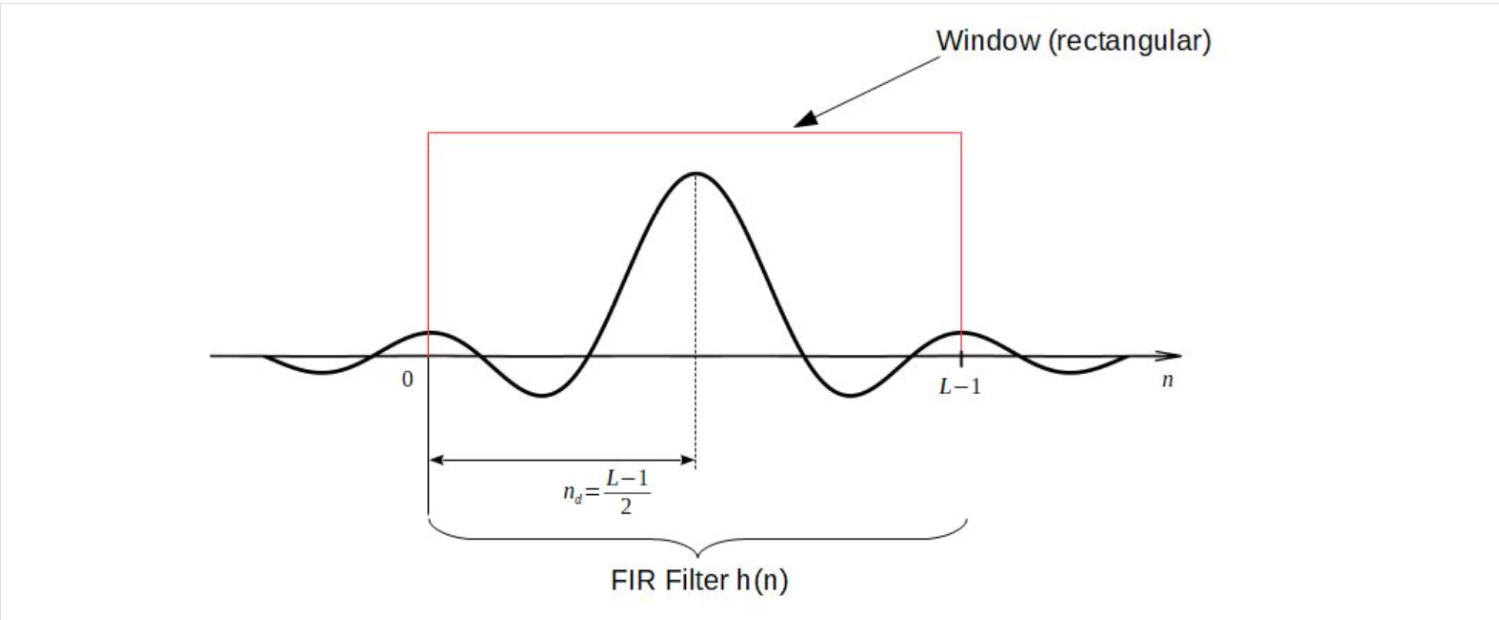

Fungsi jendela yang dibayangkan ini akan menjadi lebih menarik jika kita mengubah nilai dari 1 menjadi nilai lain. Kita bisa melihat: Filter FIR = Fungsi sinc dikali fungsi jendela persegi.

Perhatikan: Jika kita hanya menggunakan bagian terbatas dari fungsi Sinc sebagai filter kita, secara implisit kita sudah menerapkan jendela persegi. Oleh karena itu, tidak perlu menerapkannya secara eksplisit lagi.

Perkalian fungsi jendela persegi dengan respon impuls ideal dalam domain waktu menjadi konvolusi dari DTFT (Discrete Time Fourier Transform) dari fungsi jendela persegi dengan respon frekuensi ideal dalam domain frekuensi. Dengan cara ini kita dapat melihat hasilnya dalam domain frekuensi. Pada dasarnya, respon frekuensi ideal (dari fungsi sinc) "terblurring" dengan melakukan konvolusi dengan DTFT dari fungsi jendela. Idealnya, DTFT dari jendela ini harus menjadi impuls pada frekuensi nol, karena itu konvolusi tidak akan mengubah respon frekuensi ideal. Tetapi ini akan berarti jendela yang tak berujung panjangnya dalam domain waktu. Kita memiliki jendela persegi berhingga dalam domain waktu yang menjadi fungsi Sinc lain dalam domain frekuensi, cukup berbeda dari sebuah pulse pada frekuensi nondela:

Perhatikan: Semakin panjang jendela dalam domain waktu, semakin sempit pula fungsi Sinc-nya dalam domain frekuensi, dan semakin mirip dengan sebuah impuls. Oleh karena itu, untuk filter yang lebih baik kita memerlukan jendela yang lebih panjang!

Mari kita lihat apa yang sebenarnya kita miliki, di iPython, dengan jendela:

<IPython.core.display.Javascript object>


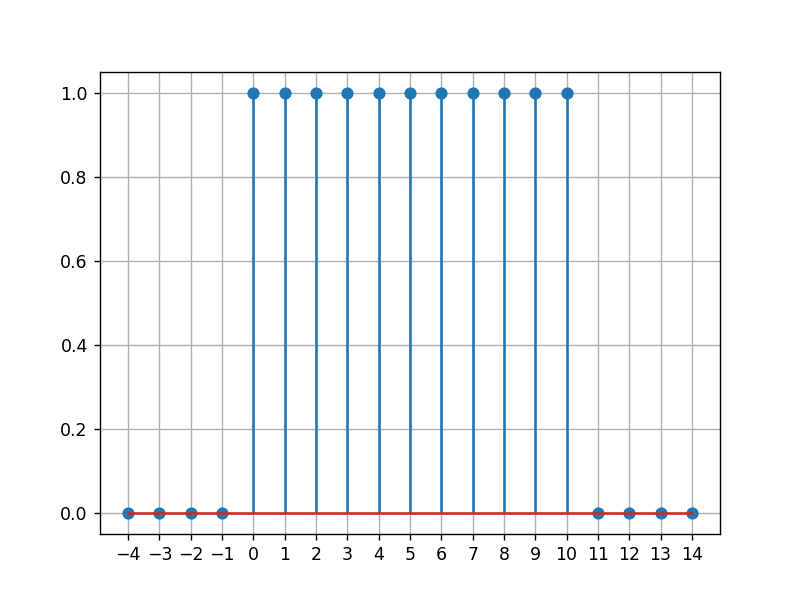

In [5]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

L=11
h = np.concatenate((np.zeros(4),np.ones(L),np.zeros(4)),axis=0)
plt.figure()
plt.stem(np.arange(-4, L+4, step=1), h, use_line_collection=True)
plt.xticks(np.arange(-4, L+4, step=1))
plt.grid();

<IPython.core.display.Javascript object>


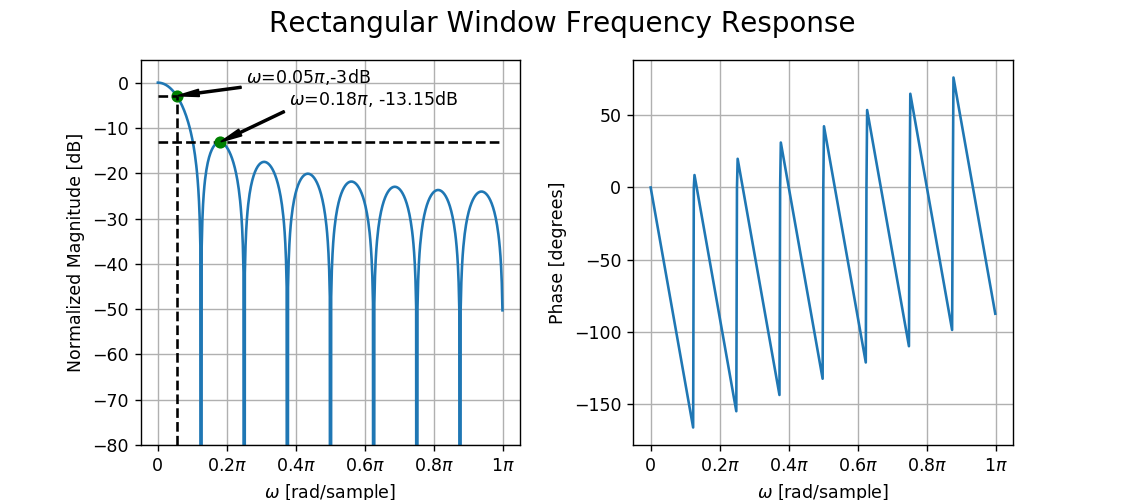

interactive(children=(IntSlider(value=16, description='L', max=128, min=2), Checkbox(value=False, description=…

In [6]:
from ipywidgets import interact
import ipywidgets as widgets
from matplotlib.ticker import FuncFormatter, MultipleLocator
from scipy.signal import argrelextrema
import scipy.signal as signal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))
fig.suptitle('Rectangular Window Frequency Response', fontsize=16)
plt.subplots_adjust(wspace=0.3)

@interact(L=widgets.IntSlider(min=2, max=128, step=1, value=16),unwrap=False)
def plot_recWindow_H(L=16, unwrap=False):
    h = np.concatenate((np.ones(L),np.zeros(4)),axis=0)
    omega, H =signal.freqz(h[:-4],worN=512)
    H[np.abs(H) < np.finfo(float).eps] = np.finfo(float).eps
    H_dB=20*np.log10(np.abs(H)/np.abs(H).max())
    p3dB=np.max(H_dB)-3
    p3dBIndex= np.max(np.where(H_dB >= p3dB))
    wp=omega[p3dBIndex]
    Hp=H_dB[p3dBIndex]
    ax1.clear()
    ax1.plot(omega, H_dB)
    ax1.plot(wp, Hp,'go')
    ax1.plot((0, wp), (Hp, Hp), 'k--') 
    ax1.plot((wp, wp), (-80, Hp), 'k--') 
    ax1.set_ylim((-80,H_dB.max()+5))
    ax1.annotate(r'$\omega$={:.2f}$\pi$,-3dB'.format(wp/np.pi), xy=(wp, Hp), xytext=(wp+0.2*np.pi, 0),
            arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
    if L!=2:
        side_lobe=argrelextrema(np.abs(H), np.greater)[0][0]
        ax1.plot((0, omega[-1]),(H_dB[side_lobe],H_dB[side_lobe]), 'k--') 
        ax1.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}dB'.format(omega[side_lobe]/np.pi,H_dB[side_lobe]), 
                     xy=(omega[side_lobe], H_dB[side_lobe]), xytext=(omega[side_lobe]+0.2*np.pi, -5),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
        ax1.plot(omega[side_lobe], H_dB[side_lobe],'go')
        
    ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax1.xaxis.set_major_locator(MultipleLocator(base=0.2*np.pi))
    ax1.grid(True)
    ax1.set_xlabel(r'$\omega$ [rad/sample]')
    ax1.set_ylabel(r'Normalized Magnitude [dB]')
    
    
    ax2.clear()
    phase=np.angle(H,deg=True)
    if unwrap:
        phase=np.unwrap(phase)
    ax2.plot(omega,phase)
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax2.xaxis.set_major_locator(MultipleLocator(base=0.2*np.pi))
    ax2.grid(True)
    ax2.set_xlabel(r'$\omega$ [rad/sample]')
    ax2.set_ylabel(r'Phase [degrees]')
    

Di sini kita bisa melihat bahwa jauh dari menjadi sebuah impuls pada frekuensi nol. Bahkan ini agak lebar dan juga attenuasinya tidak terlalu tinggi, sekitar -15 hingga -20 dB. Kita mengharapkan bahwa filter low pass kita yang dihasilkan akan "mewarisi" properti ini melalui konvolusi dalam domain frekuensi.

"Pita lintas" atau lebar lobe utama dari fungsi jendela kita akan menentukan lebar pita transisi dari filter kita yang dihasilkan, dan attenuasi pita henti dari jendela akan menentukan attenuasi pita henti yang dihasilkan dari filter kita.

Ini menunjukkan bahwa fungsi jendela membentuk karakteristik kunci dari filter FIR kita yang dihasilkan!

Contoh: Ambil contoh filter downsampling kita yang seharusnya mengurangi frekuensi mulai dari 11 kHz, pada laju sampel 44,1 kHz. Kita ingin memiliki attenuasi -60 dB di pita henti. Oleh karena itu, kita mendapatkan frekuensi ternormalisasi untuk awal pita henti kita sebagai:=ωs:
$$\large
\omega_s=\frac{11 }{ 44.1 }\cdot 2 \cdot \pi \approx 0.5 \cdot \pi
$$

Oleh karena itu, respon frekuensi yang diinginkan kita adalah 1 antara frekuensi 0 dan ωs (atau lebih baik: antara −ωs hingga ωs untuk juga menyertakan sumbu frekuensi negatif). Sekarang ambil invers DTFT dari respon frekuensi ideal yang diinginkan Hd(ω) untuk mendapatkan respon impuls ideal hd(n). Karena pada awalnya kita mengasumsikan filter ideal, kita mengatur akhir pita lintas ωc identik dengan awal pita henti, $\omega_c=\omega_s$:

$$\large
h_d(n)= \frac{1} {2 \pi} \cdot \int _{\omega=-\pi} ^ \pi H_d(\omega) e^{j \omega n} d \omega= $$

$$\large
=\frac {1}  {2 \pi} \cdot \int _{\omega=-\omega_c} ^ {\omega_c}  e^{j \omega n} d \omega =
$$

$$\large
= \frac{1}  {2 \pi} \left(\frac {e^{j \cdot \omega_c n}} {j \cdot n}- \frac{e^{-j \cdot \omega_c n}} {j \cdot n}\right)=  \frac{sin(\omega_c n)}  {\pi n}
$$

(ingat: $sin(\omega)=\frac{1} {2j} \cdot (e^{j \omega} -e^{-j \omega})$ )



## Pendekatan Filter Rendah Ideal Menggunakan Jendela Persegi dan Tundaan

Kita telah melihat bahwa respon impuls dari filter rendah ideal adalah:

$$\large
h(n)=\frac{sin(\omega_c \cdot n)}{\pi \cdot n }$$

Dengan memotong respon impuls (mengalikan dengan jendela persegi) sehingga memiliki panjang L dan menerapkan tundaan $n_d=\frac{(L-1)}{2}$** kita memiliki:

$$\large
h(n)=\frac{sin\left(\omega_c \cdot (n-n_d)\right)}{\pi \cdot (n-d_d)} = 
\frac{sin\left(\omega_c \cdot \left(n-\frac{(L-1)}{2}\right)\right)}{\pi \cdot \left(n-\frac{(L-1)}{2}\right)}
$$



In [8]:
from sympy import sin, symbols, simplify, pi, lambdify, limit

wc_s = symbols('\omega_c')
n_s, L_s = symbols('n L', integer=True)

n_d_s=(L_s-1)/2
h_n_s=sin(wc_s*(n_s-n_d_s))/(pi*(n_s-n_d_s))
h_n_s

sin(\omega_c*(-L/2 + n + 1/2))/(pi*(-L/2 + n + 1/2))

In [9]:
h_0_s = limit(h_n_s,n_s,n_d_s)
h_0_s

\omega_c/pi

<IPython.core.display.Javascript object>


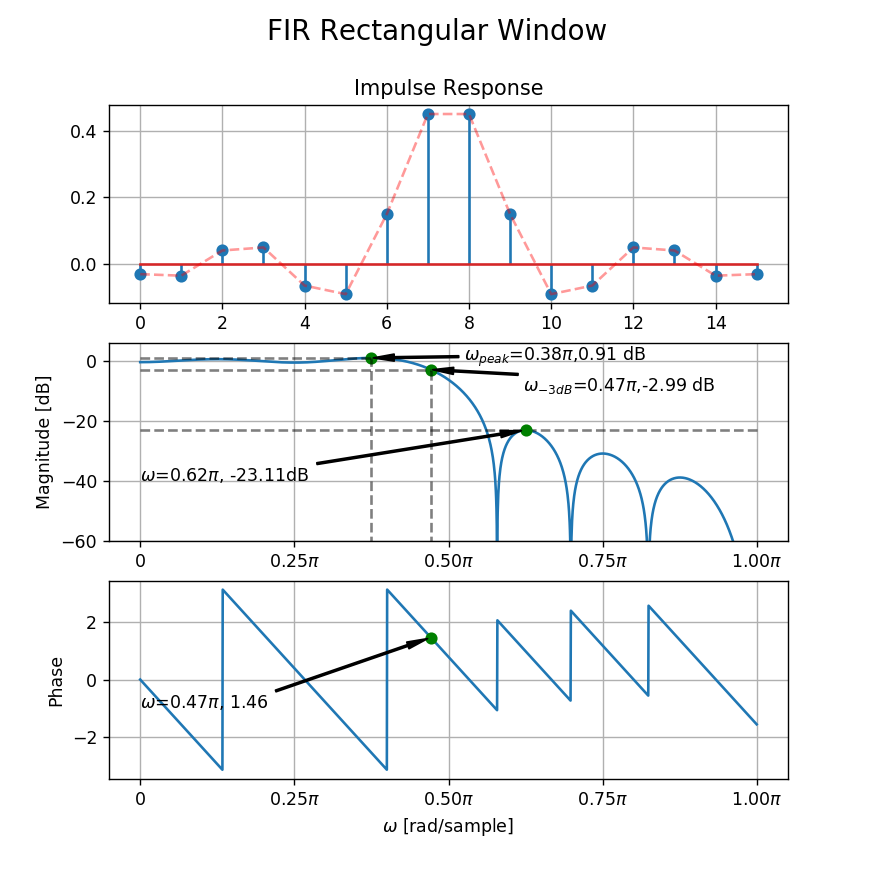

interactive(children=(IntSlider(value=16, description='L', max=128, min=2), FloatSlider(value=0.5, description…

In [11]:
h_n=lambdify((wc_s,n_s,L_s), h_n_s, 'numpy')

fig1, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(7,7))
fig1.suptitle('FIR Rectangular Window', fontsize=16)
plt.subplots_adjust(wspace=0.3)


@interact(L=widgets.IntSlider(min=2, max=128, step=1, value=16), 
          wc=widgets.FloatSlider(min=0.1, max=1, step=0.01, value=0.5), unwrap=False)
def plot_h(L=16, wc=0.5,unwrap=False):
    wc=wc*np.pi
    n=np.arange(L)
    n_d=n_d_s.subs(L_s,L).evalf()
    if L%2==0:
        h=h_n(wc,n,L)
    else:
        h=np.ones(L)
        for i in range(L):
            if i==n_d:
                h[i]=wc/np.pi
            else:
                h[i]=h_n(wc,i,L)
    ax1.clear()
    ax1.stem(h, use_line_collection=True)
    ax1.plot(h,'r--',alpha=0.4)
    ax1.set_title(r'Impulse Response')
    ax1.grid()
    
    omega, H =signal.freqz(h,worN=2048)
    H[np.abs(H) < np.finfo(float).eps] = np.finfo(float).eps
    H_dB=20*np.log10(np.abs(H))
    p3dB=-3
    p3dBIndex_down= np.max(np.where(H_dB >= p3dB))
    p3dBIndex_up= np.min(np.where(H_dB <= p3dB))
    print(H_dB[p3dBIndex_down])
    print(H_dB[p3dBIndex_up])
    if (np.abs(p3dB-H_dB[p3dBIndex_down]) >= np.abs(p3dB-H_dB[p3dBIndex_up])):
        p3dBIndex=p3dBIndex_up
    else:
        p3dBIndex=p3dBIndex_down
    wp=omega[p3dBIndex]
    Hp=H_dB[p3dBIndex]
    max_peak_ind=np.argmax(H_dB)
    
    ax2.clear()
    ax2.plot(omega, H_dB)
    ax2.plot(omega[max_peak_ind], H_dB[max_peak_ind],'go')
    ax2.plot((0, omega[max_peak_ind]), (H_dB[max_peak_ind], H_dB[max_peak_ind]), 'k--',alpha=0.5) 
    ax2.plot((omega[max_peak_ind], omega[max_peak_ind]), (-80, H_dB[max_peak_ind]), 'k--',alpha=0.5)
    ax2.annotate('$\omega_{{peak}}$={:.2f}$\pi$,{:.2f} dB'.format(omega[max_peak_ind]/np.pi,H_dB[max_peak_ind]), 
                 xy=(omega[max_peak_ind],H_dB[max_peak_ind]), xytext=(omega[max_peak_ind]+0.15*np.pi, 0),
            arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4))
    ax2.plot(wp, Hp,'go')
    ax2.plot((0, wp), (Hp, Hp), 'k--', alpha=0.5) 
    ax2.plot((wp, wp), (-80, Hp), 'k--',alpha=0.5)
    ax2.set_ylabel(r'Magnitude [dB]')
    ax2.grid()
    ax2.set_ylim((-60,H.max()+5))
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.2f}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax2.xaxis.set_major_locator(MultipleLocator(base=0.25*np.pi))
    ax2.annotate(r'$\omega_{{-3dB}}$={:.2f}$\pi$,{:.2f} dB'.format(wp/np.pi,Hp), xy=(wp, Hp), xytext=(wp+0.15*np.pi, -10),
            arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
    if L!=2:
        side_lobe=argrelextrema(np.abs(H[p3dBIndex:]), np.greater)[0][0]+p3dBIndex
        ax2.plot((0, omega[-1]),(H_dB[side_lobe],H_dB[side_lobe]), 'k--',alpha=0.5) 
        ax2.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}dB'.format(omega[side_lobe]/np.pi,H_dB[side_lobe]), 
                     xy=(omega[side_lobe], H_dB[side_lobe]), xytext=(0, -40),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
        ax2.plot(omega[side_lobe], H_dB[side_lobe],'go')
        
    ax3.clear()
    phase=np.angle(H, deg=False)
    if unwrap:
        phase=np.unwrap(phase)
        print('Delay={:.2f}'.format(phase[p3dBIndex]/wp))
    ax3.plot(omega,phase)
    ax3.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.2f}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax3.xaxis.set_major_locator(MultipleLocator(base=0.25*np.pi))
    ax3.grid(True)
    ax3.set_xlabel(r'$\omega$ [rad/sample]')
    ax3.set_ylabel(r'Phase')
    ax3.plot(wp, phase[p3dBIndex],'go')
    ax3.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}'.format(wp/np.pi,phase[p3dBIndex]), 
                     xy=(wp, phase[p3dBIndex]), xytext=(0, -1),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
    

Sekarang anggap kita ingin memiliki panjang filter L=16. Maka tundaan untuk membuat filter yang dihasilkan kausal adalah $n_d = \frac{L−1}{2} = 7.5$. Oleh karena itu, filter kita menjadi:

$$\large
h(n)=\frac{sin(\omega_c(n-7.5))}{\pi(n-7.5)} \text{for n=0,...,15.}$$

Inilah filter FIR kausal hasilnya dengan fungsi jendela persegi.

Pita lintas memiliki gelombang sekitar +/- 0,5 dB. 0,5 dB sesuai dengan faktor $10^{\frac{0.5}{20}}\approx 1.06$, yang berarti hanya 6% overshoot atau undershoot, dan biasanya sudah cukup baik.

Namun, di sini kita juga dapat melihat bahwa filter ini mungkin memiliki attenuasi sekitar -10 dB pada frekuensi ternormalisasi $0.5 \cdot \pi$, dan lobe sisi pertama hanya memiliki attenuasi sekitar -20 dB. Oleh karena itu, filter ini tidak memenuhi persyaratan kami untuk setidaknya attenuasi -60 dB mulai dari frekuensi ternormalisasi $0.5 \cdot \pi$.

Untuk plot fasa: Kita memiliki tundaan $n_d=7.5$ dengan filter kita. Karena ini adalah filter fase linear, kita harapkan fasa menjadi $-7.5\cdot \omega$. Kita dapat memverifikasi ini dalam plot kita, misalnya pada frekuensi ω=0.1⋅π, dalam plot kita di sumbu x 0.1. Dalam derajat kita dapatkan $7.5\cdot 0.1\cdot\pi\cdot \frac{180}{\pi}=135$. Ini adalah yang memang kita lihat secara kasar dalam plot.

Sekarang kita memiliki filter dengan kesalahan kuadrat minimum dibandingkan dengan ideal yang kita berikan. Tetapi apakah ini benar-benar yang kita inginkan?

Masalah yang kita dapatkan disebut "Fenomena Gibbs". Ini mengatakan bahwa kesalahan muncul sebagai gelombang pada magnitudo pita lintas dan pita henti. Bagian menariknya adalah, bahwa gelombang pada dekat tepi pita lintas dan pita henti tidak menjadi lebih kecil saat L menjadi lebih besar (kesalahan yang lebih kecil dalam pendekatan), tetapi mereka hanya menjadi lebih sempit! Ini adalah hasil dari konvolusi respon frekuensi ideal kita dengan fungsi sinc dari jendela persegi. Fungsi sinc ini hanya menjadi lebih sempit saat kita meningkatkan panjangnya L, tetapi tinggi gelombangnya tetap sama.

Ini berarti, kesalahan maksimum yang kita dapatkan tidak menjadi lebih kecil saat kita meningkatkan L! (yang buruk).

Perhatikan: Ukuran gelombang dekat tepi pita lintas dan pita henti hanya menjadi lebih sempit (sehingga luas yang berkurang dan oleh karena itu kesalahan kuadrat yang berkurang), tetapi tingginya tidak menjadi lebih kecil dengan meningkatnya L. Di sini mereka selalu tetap sekitar 0,1 di pita henti, yang sesuai dengan sekitar -20 dB! (Yang tidak akan mencukupi dalam contoh filter anti-aliasing kita.)

Untuk melihat bagaimana Fenomena Gibbs terjadi, kita dapat melihat skema kita dalam domain frekuensi:

Pada dasarnya kita mengalikan respon impuls ideal kita dengan jendela persegi. Dalam domain frekuensi, ini berarti konvolusi dari respon frekuensi ideal (dengan perubahan fase melalui tundaan nd) dengan respon frekuensi dari jendela persegi. Yang terakhir adalah fungsi sinc yang sempit, dengan gelombang yang sesuai di sisi lob utamanya. Dan gelombang-gelombang tersebut adalah yang muncul sebagai Fenomena Gibbs. Jika kita membuat jendela kita lebih panjang (L lebih besar), fungsi sinc menjadi lebih sempit, tetapi tinggi gelombang tidak berkurang, tetapi tetap konstan!

Sebenarnya dalam sebagian besar aplikasi, apa yang kita inginkan bukanlah meminimalkan kesalahan kuadrat, tetapi meminimalkan kesalahan maksimum! Pada dasarnya, kita memilih ukuran kesalahan yang salah.

Ini juga menyarankan modifikasi untuk menurunkan tinggi gelombang. Alih-alih menggunakan jendela persegi, kita bisa menggunakan jendela alternatif, yang memiliki gelombang lebih rendah dalam domain frekuensi.

Jendela yang umum digunakan adalah jendela cosine raised atau jendela sinus.